# UNAD

# GRUPO: 202016908_30
# ESTUDIANTE: NURY_MONTAÑEZ

# AGRUPAMIENTO EN K-MEANS

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [36]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [37]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('Mall_Customers.csv')

In [38]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(20)

,ClienteID,Genero,Edad,Ingresos_Anuales,Puntuacion_Gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [39]:
# Descripción de los datos
Datos.describe()

,ClienteID,Edad,Ingresos_Anuales,Puntuacion_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

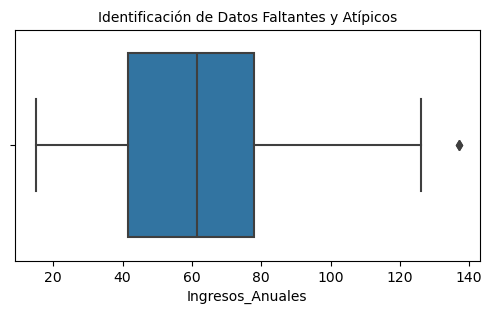

In [40]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Ingresos_Anuales'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [41]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingresos Anuales: ",Datos['Ingresos_Anuales'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuacion Gasto (1-100): ",Datos['Puntuacion_Gasto'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingresos Anuales:  0
Cantidad de Registros con cero en Puntuacion Gasto (1-100):  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

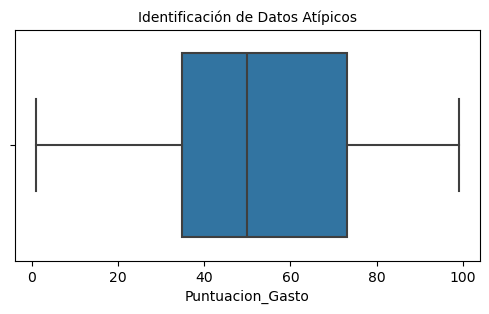

In [42]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Puntuacion_Gasto'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [43]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Puntuacion_Gasto']<nivel_minimo)|(Datos['Puntuacion_Gasto']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [44]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ClienteID         200 non-null    int64 
 1   Genero            200 non-null    object
 2   Edad              200 non-null    int64 
 3   Ingresos_Anuales  200 non-null    int64 
 4   Puntuacion_Gasto  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


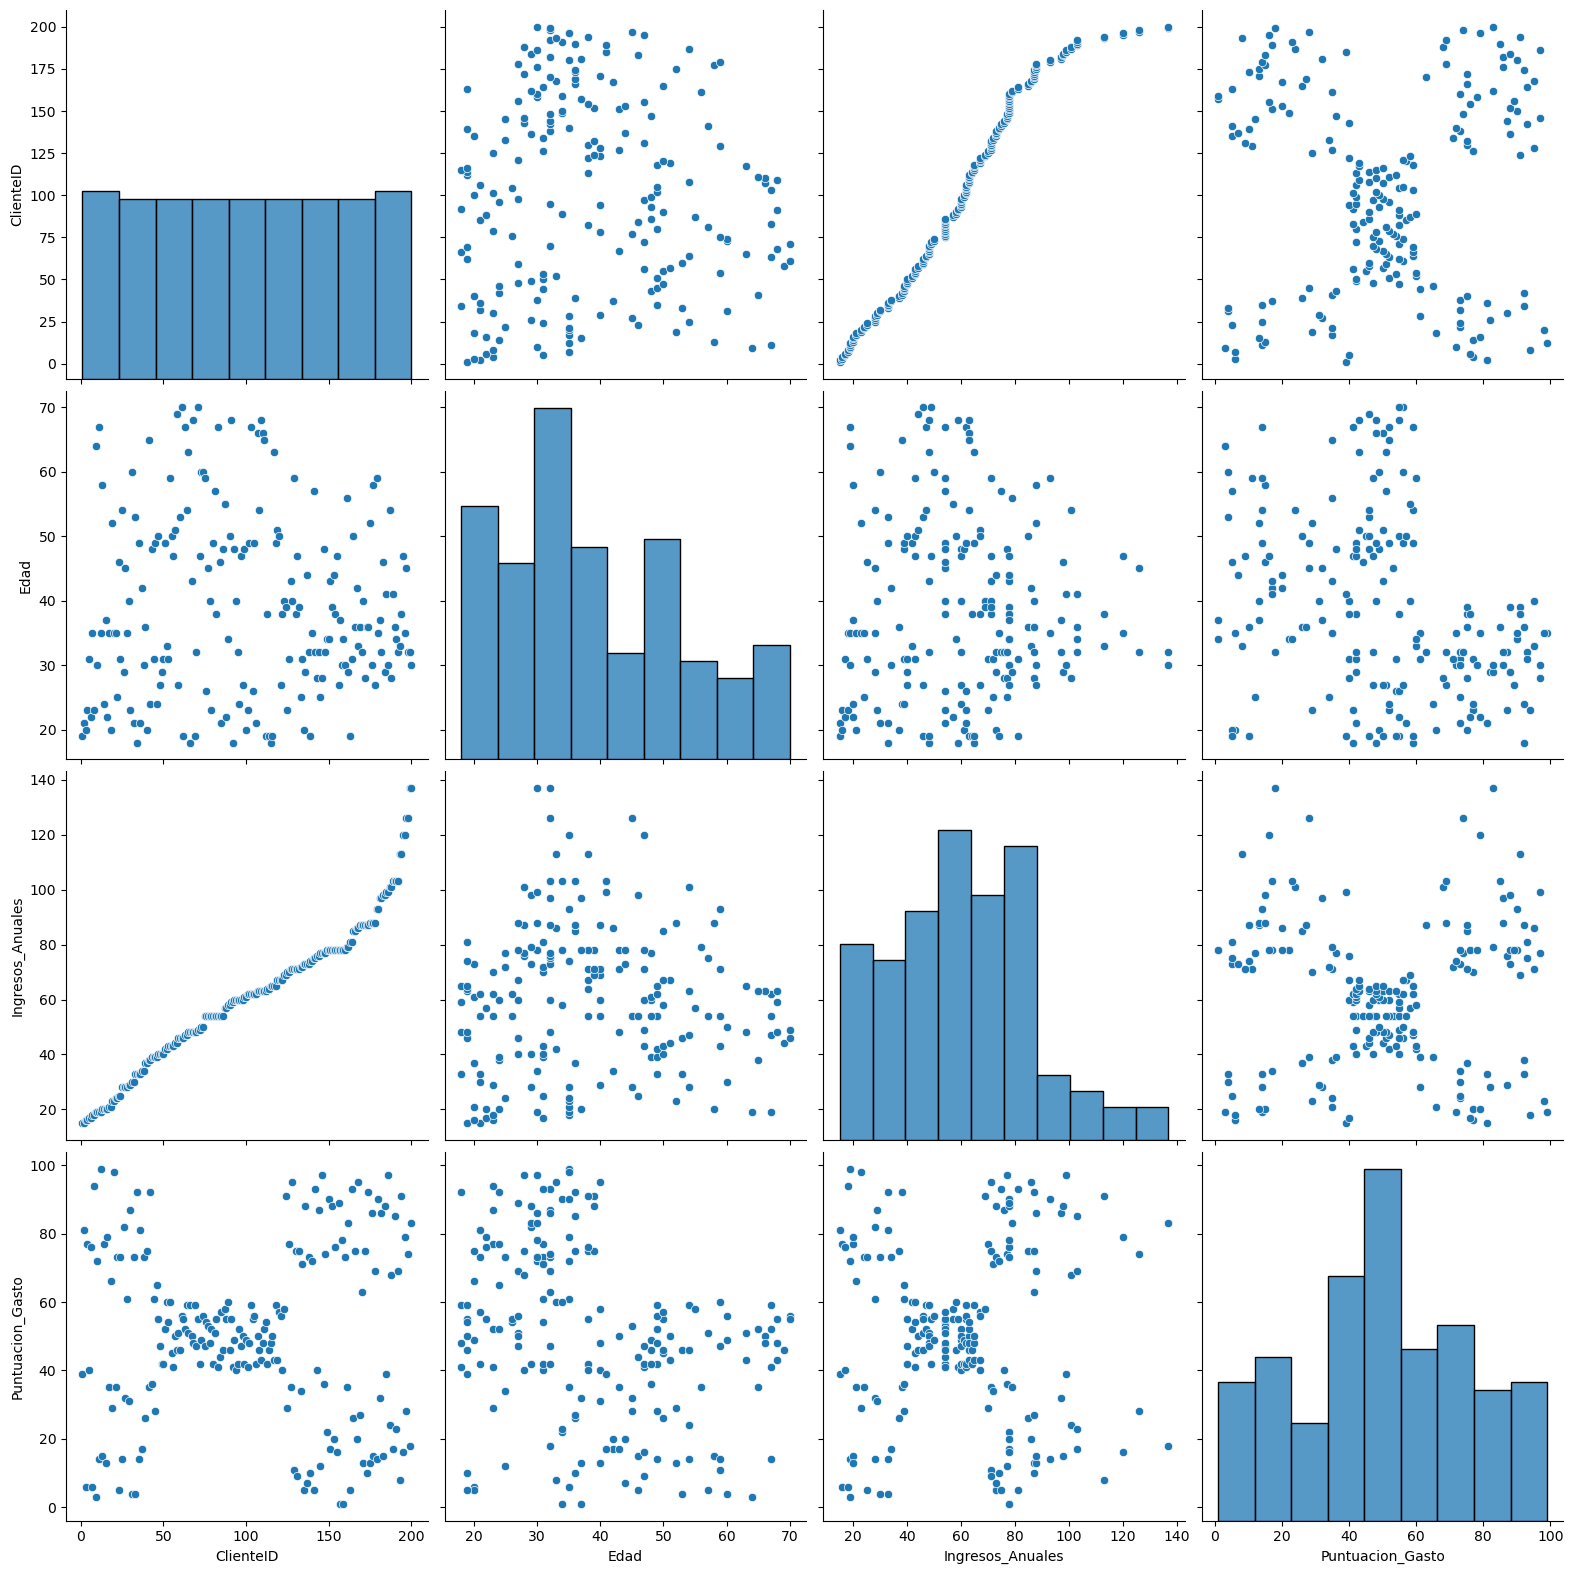

In [45]:
# crea un gráfico de pares que muestra la relación entre todas las variables en el DataFrame 

sns.pairplot(Datos.dropna(), size=4,kind='scatter')

In [46]:
# Matriz de correlación

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Genero' utilizando LabelEncoder
Datos['Genero'] = label_encoder.fit_transform(Datos['Genero'])

# Ahora 'Genero' se convierte en una columna numérica, donde 'Male' es 1 y 'Female' es 0

# Ahora se puede calcular la matriz de correlación con la columna 'Genero' codificada numéricamente
corr_matrix = Datos.corr()
corr_matrix

,ClienteID,Genero,Edad,Ingresos_Anuales,Puntuacion_Gasto
ClienteID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genero,0.057400,1.000000,0.060867,0.056410,-0.058109
Edad,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Ingresos_Anuales,0.977548,0.056410,-0.012398,1.000000,0.009903
Puntuacion_Gasto,0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

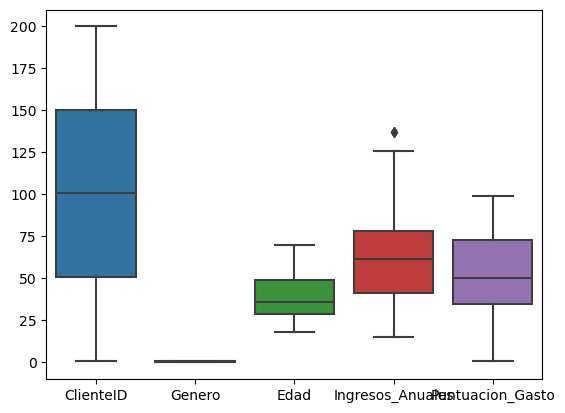

In [47]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=Datos)

# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:

- Ingresos Anuales
- Puntuación Gasto

In [48]:
# Filtrar columnas del modelo 

Datos = Datos[["Edad","Ingresos_Anuales","Puntuacion_Gasto"]]

In [49]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Edad,Ingresos_Anuales,Puntuacion_Gasto
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


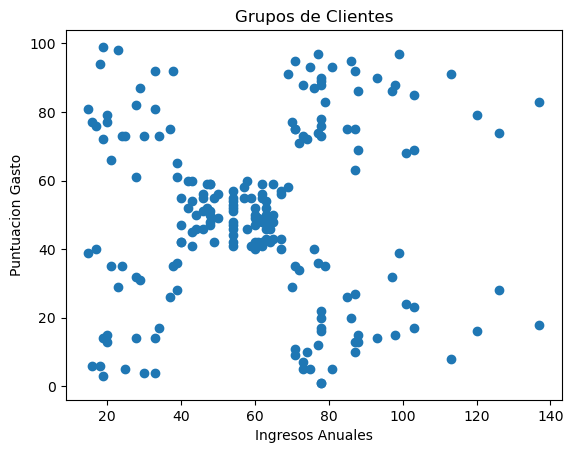

In [50]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Ingresos_Anuales'], Datos['Puntuacion_Gasto'])
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuacion Gasto')
plt.title('Grupos de Clientes')
plt.show()

# 4. Entrenar el modelo configurando los diferentes hiperparámetros

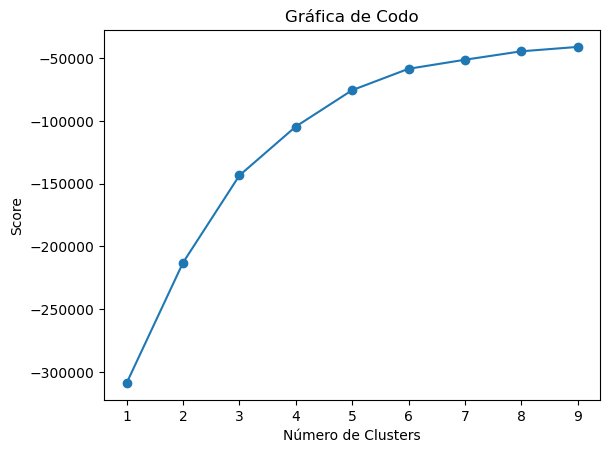

In [51]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [52]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [53]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Edad  Ingresos_Anuales  Puntuacion_Gasto  Grupo
0      19                15                39      0
1      21                15                81      4
2      20                16                 6      0
3      23                16                77      4
4      31                17                40      0
..    ...               ...               ...    ...
195    35               120                79      1
196    45               126                28      3
197    32               126                74      1
198    32               137                18      3
199    30               137                83      1

[200 rows x 4 columns]


# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [54]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Indice Calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199782  |
+--------------------------+---------------------+


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

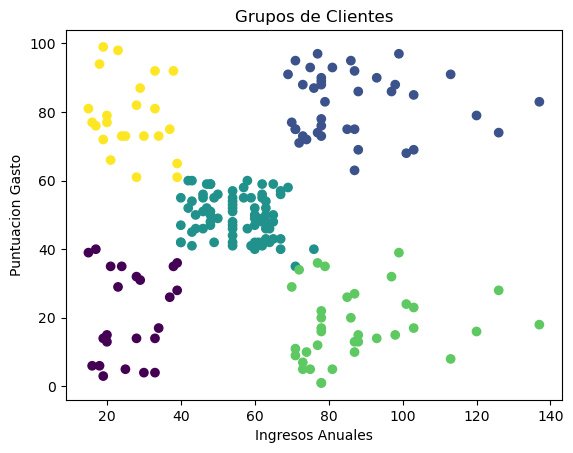

In [55]:
plt.scatter(Datos['Ingresos_Anuales'], Datos['Puntuacion_Gasto'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuacion Gasto')
plt.title('Grupos de Clientes')
plt.show()

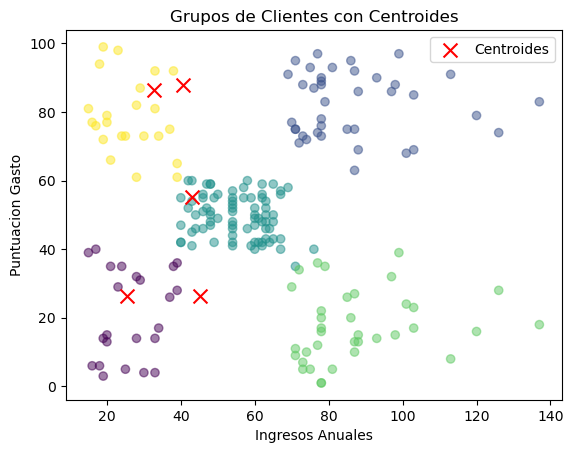

In [56]:
# Después de ajustar el modelo K-Means
centroides = Modelo.cluster_centers_

# Graficar los datos junto con los centroides
plt.scatter(Datos['Ingresos_Anuales'], Datos['Puntuacion_Gasto'], c=Modelo.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, c='red', label='Centroides')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuacion Gasto')
plt.title('Grupos de Clientes con Centroides')
plt.legend()
plt.show()


In [57]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = Modelo.labels_
# Obtenemos los centroides
C = Modelo.cluster_centers_
colores = ['red', 'green', 'cyan', 'blue', 'magenta']  # Definimos colores para cada cluster
asignar = [colores[i] for i in labels]  # Asignamos un color a cada punto basado en su cluster


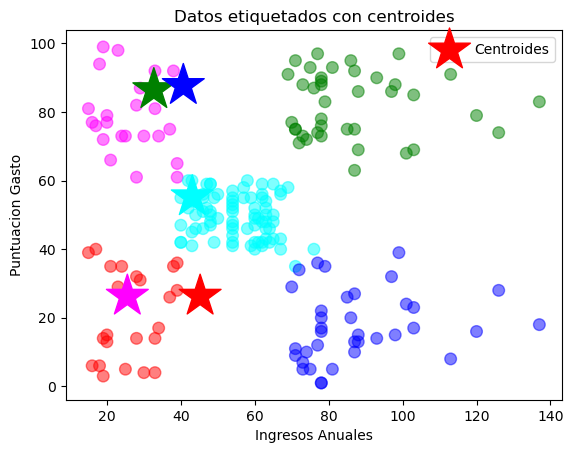

In [58]:
# Graficamos los datos etiquetados y los centroides
plt.scatter(Datos['Ingresos_Anuales'], Datos['Puntuacion_Gasto'], c=asignar, s=70, alpha=0.5)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000, label='Centroides')
plt.title('Datos etiquetados con centroides')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuacion Gasto')
plt.legend()
plt.show()

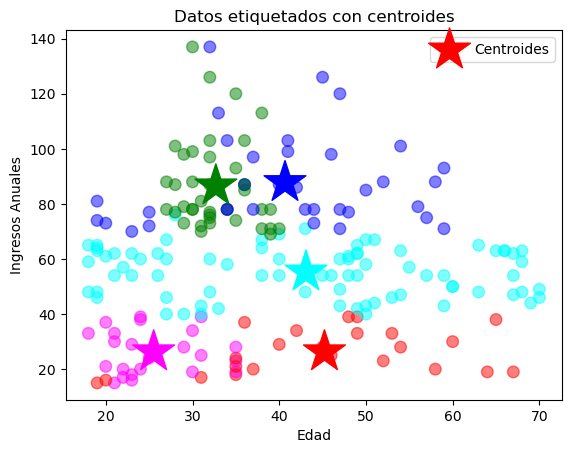

In [59]:
# Graficamos los datos etiquetados y los centroides
f1 = Datos['Edad'].values
f2 = Datos['Ingresos_Anuales'].values
plt.scatter(f1, f2, c=asignar, s=70, alpha=0.5)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000, label='Centroides')  
plt.title('Datos etiquetados con centroides')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales')
plt.legend()
plt.show()

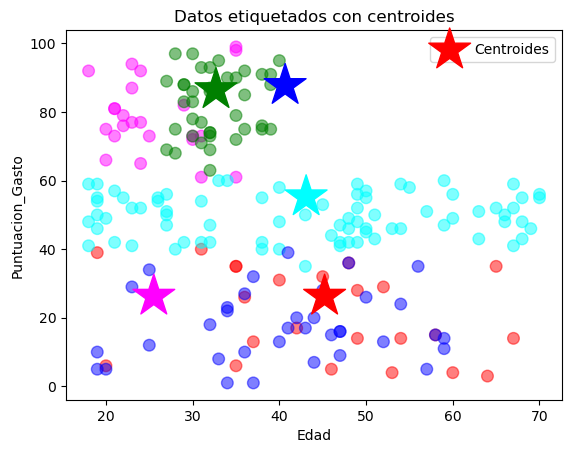

In [60]:
# Graficamos los datos etiquetados y los centroides
f1 = Datos['Edad'].values
f2 = Datos['Puntuacion_Gasto'].values
plt.scatter(f1, f2, c=asignar, s=70, alpha=0.5)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000, label='Centroides') 
plt.title('Datos etiquetados con centroides')
plt.xlabel('Edad')
plt.ylabel('Puntuacion_Gasto')
plt.legend()
plt.show()

# 7. Interpretar, analizar y documentar los resultados obtenidos

- Coeficiente Silhouette: El coeficiente de Silhouette proporciona una medida de cuán bien separados están los clusters. Varía entre -1 y 1, donde un valor más alto indica que los puntos están más cerca de los puntos de su propio cluster que de los puntos de otros clusters. Un valor cercano a 0 indica que los puntos están cerca del límite de decisión entre dos clusters. En este caso, un valor de 0.44 sugiere que la separación entre clusters es razonablemente buena.

- Índice Calinski Harabasz: Este índice mide la separación entre clusters y su cohesión. Cuanto mayor sea el valor, mejor será la separación entre los clusters. Un valor alto indica que los clusters son densos y bien separados Para este caso, un valor de 151.04 sugiere que los clusters están bien definidos y separados.

- Índice Davies Bouldin: Este índice es una medida de la "bondad" de los clusters, basada en su separación y compacidad. Un valor más bajo indica clusters mejores y más densos. Un valor cercano a 0 indica una mejor partición. en este caso sobre los clientes del centro comercial, un valor de 0.82 sugiere que los clusters tienen una buena separación y compacidad.

- Quienes obtienen ingresos anuales iguales o menores a 40 tienden a no tener una puntuación en gasto entre 40 y 60 puntos.

- Los clientes con ingresos anuales entre 40 y 80 muestran una puntuación de gasto bastante consistente dentro de un rango específico.

- Los clientes con ingresos anuales superiores a 70 exhiben una variabilidad significativa en sus puntuaciones de gasto, como se observa en el gráfico. Esta variabilidad se destaca especialmente en dos rangos principales: entre 0 y 40, y entre 60 y 100 en la escala de puntuación de gasto.
  
- Los centroides ayudan a comprender mejor la distribución y la estructura de los clusters en el espacio de características. 
En el caso del gráfico con edad y puntuación de gasto, los clusters representan diferentes grupos demográficos con diferentes comportamientos de gasto. En otro gráfico con ingreso anual y puntuación de gasto, los clusters representan diferentes segmentos de clientes basados en su capacidad de gasto y su comportamiento de compra.